Diccionario de Datos – Bitcoin Dataset
Para la realización de esta práctica hicimos uso del archivo coin_Bitcoin.csv, el cual contiene información histórica sobre el precio y volumen de Bitcoin.
1. Información General del Dataset
Nombre del Archivo: coin_Bitcoin.csv
Descripción: Contiene datos históricos de precios y volúmenes de Bitcoin en distintos periodos.
Fuente: [https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory]
Periodo de Cobertura: [29 abril 2013 - 06 julio 2021]
Frecuencia de los Datos: Diario
Número de Registros: [2991]
Número de Variables: [10]

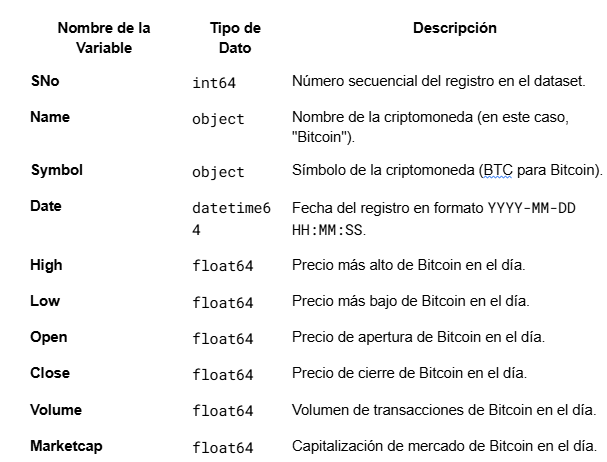

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("coin_Bitcoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


# **Propuesta de solución para el suavizamiento de una serie de tiempo**

***Suavizamiento promedio móvil simple***

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Promedio Móvil Simple (SMA) de 7 días
df['SMA_7'] = df['Close'].rolling(window=7).mean()

# Promedio Móvil Ponderado (WMA) de 7 días
weights = [i for i in range(1, 8)]  # Pesos de 1 a 7
df['WMA_7'] = df['Close'].rolling(window=7).apply(lambda x: sum(weights * x) / sum(weights), raw=False)

df[['Close', 'SMA_7', 'WMA_7']].head()

,Close,SMA_7,WMA_7
Date,,,
2013-04-29 23:59:59,144.539993,NaN,NaN
2013-04-30 23:59:59,139.000000,NaN,NaN
2013-05-01 23:59:59,116.989998,NaN,NaN
2013-05-02 23:59:59,105.209999,NaN,NaN
2013-05-03 23:59:59,97.750000,NaN,NaN


***Suavizamiento promedio móvil ponderado***

In [ ]:
# Ajustamos la ventana para no generar valores NaN. Haremosuna ventana dinámica
# que será el número de días disponibles para cada cálculo (desde el inicio hasta el día n).

# Promedio Móvil Simple (SMA)
df['SMA_dynamic'] = df['Close'].expanding().mean()

# Promedio Móvil Ponderado (WMA)
df['WMA_dynamic'] = df['Close'].expanding().apply(lambda x: sum(range(1, len(x) + 1) * x) / sum(range(1, len(x) + 1)), raw=False)

df[['Close', 'SMA_dynamic', 'WMA_dynamic']].head()

,Close,SMA_dynamic,WMA_dynamic
Date,,,
2013-04-29 23:59:59,144.539993,144.539993,144.539993
2013-04-30 23:59:59,139.000000,141.769997,140.846664
2013-05-01 23:59:59,116.989998,133.509997,128.918331
2013-05-02 23:59:59,105.209999,126.434998,119.434998
2013-05-03 23:59:59,97.750000,120.697998,112.206666


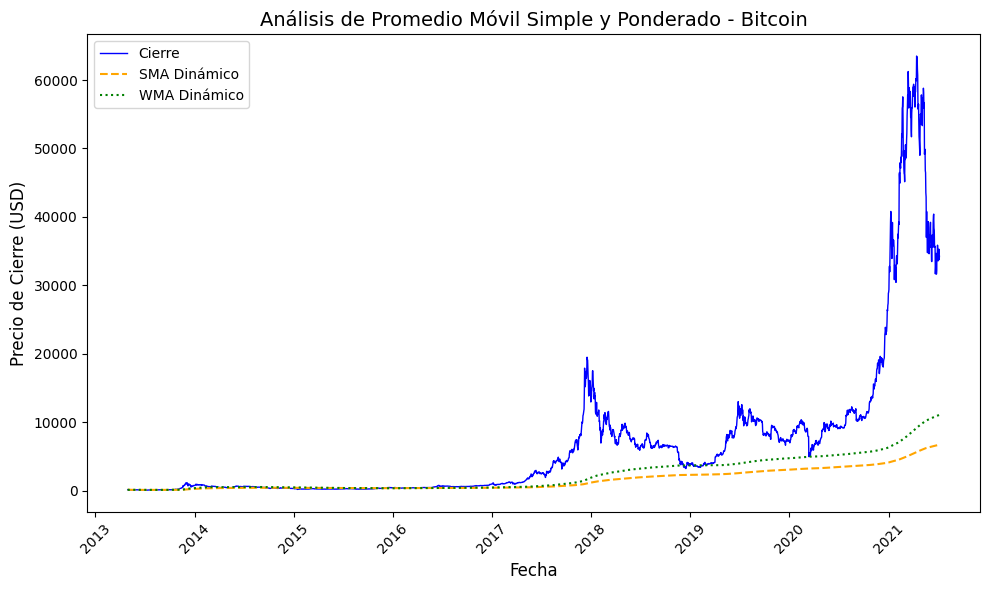

In [ ]:
import matplotlib.pyplot as plt

# series de tiempo de: Cierre, SMA dinámico y WMA dinámico
plt.figure(figsize=(10, 6))

#precio de cierre original
plt.plot(df.index, df['Close'], label='Cierre', color='blue', linewidth=1)

# Promedio Móvil Simple (SMA)
plt.plot(df.index, df['SMA_dynamic'], label='SMA Dinámico', color='orange', linestyle='--', linewidth=1.5)

# Promedio Móvil Ponderado (WMA)
plt.plot(df.index, df['WMA_dynamic'], label='WMA Dinámico', color='green', linestyle=':', linewidth=1.5)

plt.title('Análisis de Promedio Móvil Simple y Ponderado - Bitcoin', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre (USD)', fontsize=12)
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   Cierre (en azul): El precio de cierre de Bitcoin.
*   
SMA Dinámico (en naranja): El Promedio Móvil Simple calculado de forma dinámica.
*   WMA Dinámico (en verde): El Promedio Móvil Ponderado calculado de manera dinámica.

Con estos gráficos podemos checar cómo se comportan ambos promedios móviles en relación con el precio de cierre de Bitcoin.

***Suavizamiento exponencial simple***

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


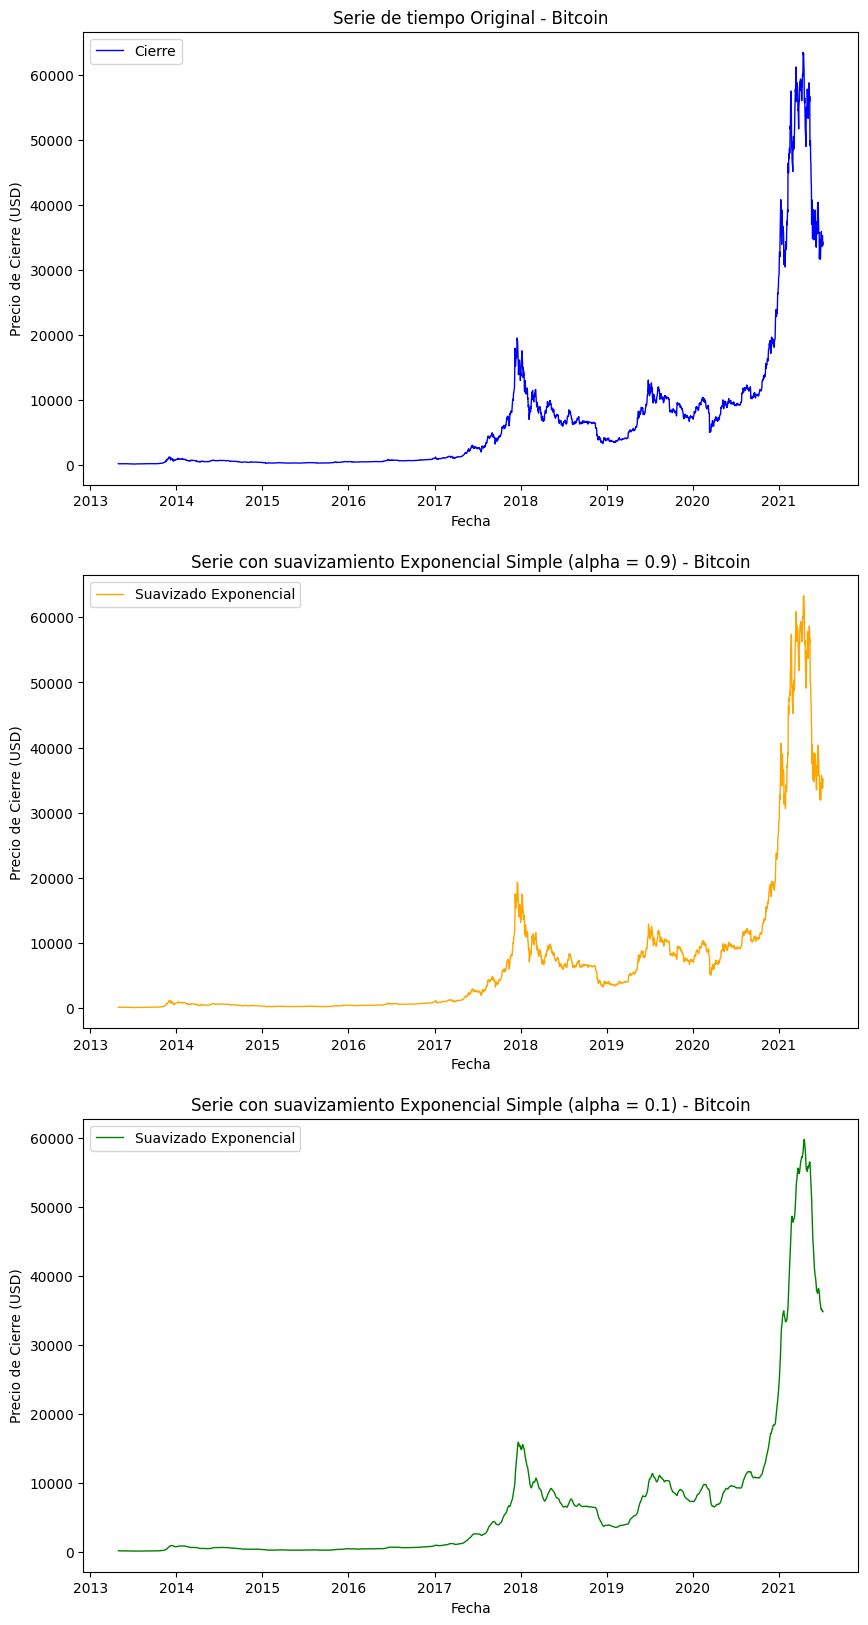

Valor último antes de la predicción: 34235.19345116
Predicción con alpha = 0.9: 2021-07-07 23:59:59    34200.994031
Freq: D, dtype: float64
Predicción con alpha = 0.1: 2021-07-07 23:59:59    34747.192885
Freq: D, dtype: float64


In [ ]:
#Importamos la librería que nos ayuda a hacer el suavizamiento
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#Elejimos la columna "Close" que es el precio de cierre
suav_exponencial = df['Close']

#Aqui podemos ajustar el alpha, valores cercanos a 1 significa que le da más peso a valores actuales, mientras que valores cercanos a 0 le da más peso a valores pasados
modelo_exponencial = SimpleExpSmoothing(suav_exponencial).fit(smoothing_level=0.9)
predic = modelo_exponencial.forecast(steps=1) #Hacemos una predicción para la próxima fecha

#Creamos otro modelo pero ahora con un alpha menor
modelo_exponencial_2 = SimpleExpSmoothing(suav_exponencial).fit(smoothing_level=0.1)
predic_2 = modelo_exponencial_2.forecast(steps=1)

#Visualizamos el suavizamiento y las predicciones
#Le damos medidas a los subplot (alto y ancho)
plt.figure(figsize=(10, 20))

#La primera gráfica es las serie de tiempo original
plt.subplot(3, 1, 1)
plt.title("Serie de tiempo Original - Bitcoin")
plt.plot(df.index, suav_exponencial, label='Cierre', color='blue', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()

#La segunda gráfica es la serie suavizada con un alpha de 0.9
plt.subplot(3, 1, 2)
plt.title('Serie con suavizamiento Exponencial Simple (alpha = 0.9) - Bitcoin')
plt.plot(modelo_exponencial.fittedvalues.index, modelo_exponencial.fittedvalues, label='Suavizado Exponencial', color='orange', linewidth=1)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')

#La tercera gráfica es la serie suavida con un alpha de 0.1
plt.subplot(3, 1, 3)
plt.title('Serie con suavizamiento Exponencial Simple (alpha = 0.1) - Bitcoin')
plt.plot(modelo_exponencial_2.fittedvalues.index, modelo_exponencial_2.fittedvalues, label='Suavizado Exponencial', color='green', linewidth=1)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')

#Mostramos las 3 gráficas
plt.show()

#Valor último antes de la predicción
print("Valor último antes de la predicción:", suav_exponencial.iloc[-1])
#Valor predicho
print("Predicción con alpha = 0.9:", predic)
print("Predicción con alpha = 0.1:", predic_2)

Analizando las gráficas que obtuvimos, podemos observar claramente las diferencias entre elegir un alpha muy grande o pequeño para el suavizamiento exponencial, en primer lugar tenemos que para un alpha de 0.9, el suavizamiento logra capturar casi de forma perfecta la forma de la serie original, y es de esperase ya que al darle más peso a los valores actuales que a los pasados, logra capturar mejor los cambios bruscos que la criptomoneda pueda presentar, pero también se ajusta mucho al ruido que tenía originalmente la serie.

Ahora por otra parte, cuando bajamos el alpha a 0.1, dandole más peso ahora a los valores pasados, tenemos que al aplicarle el suavizamiento obtenemos una representación de la forma de la serie general y no tan detallada, describiendo mejor las tendencias de la serie.

Por otro lado, tenemos las dos predicciones hechas para cada suavizamiento, tomando como referencia el último valor de la serie (34235), veemos que la predicción del suavizamiento con alpha = 0.9 (34200) es más cercana o certera al valor anterior, osea tiene una diferencia más pequeña a comparación de un alpha = 0.1, ya que este tiene una diferencia de 500 dolares (34747), por lo que en primera instancia podríamos decir que el primer suavizamiento es mejor, pero tomando lo dicho anteriormente al describir esta, el o los resultados pueden ser muy variables en el contexto de que al capturar todo el ruido de la serie, puede que para una predicción el valor sea certero, pero para más de una, puede llegar a tener un sobreajuste dándonos valores con mucha varianza, a diferencia de el suavizamiento de 0.1, ya que este podríamos decir que nos da valores con un error constante o que podemos conocer (calcular), y nos da valores más uniformes (sin tanta varianza).

Concluyendo, el suavizamiento con valores altos, en este problema, nos ayuda a hacer predicciones a corto plazo, es decir, si queremos invertir en criptomonedas en un lapso no muy largo, podría ser una buena opción ya que podríamos hacer un pronóstico sobre en que momento la moneda va a tender al alta, mientras que con un suavizamiento con valores bajos, al capturar la tendencia general del precio, nos ayuda a hacer pronósticos a largo plazo, osea cuando no queremos ver alguna ganancia de manera inmediata, si no identificar si a futuro la moneda va a ser estable y por lo tanto la inversión pueda ser segura.

***Suavizamiento por descomposición***

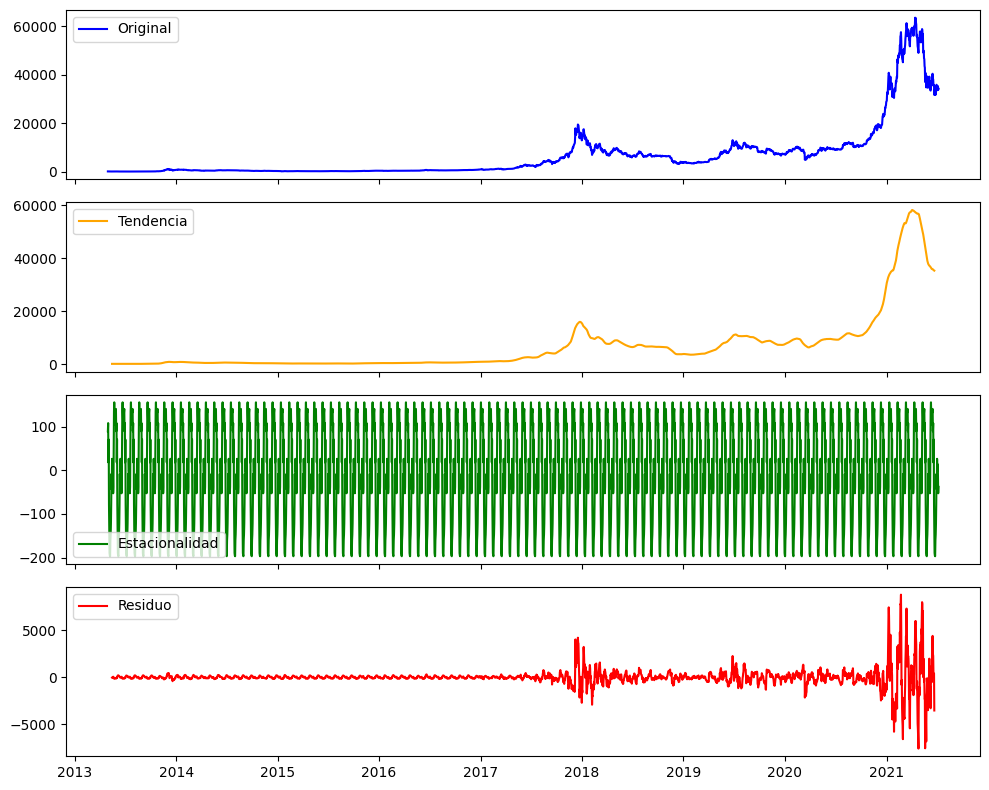

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# columna Close para análisis
close_series = df['Close']

# Aplicar la descomposición aditiva para evaluar los componentes
decomposition = seasonal_decompose(close_series, model='additive', period=30)  # Asumiendo un ciclo mensual

# Visualizar los resultados de la descomposición
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(close_series, label='Original', color='blue')
axes[0].legend(loc='best')
axes[1].plot(decomposition.trend, label='Tendencia', color='orange')
axes[1].legend(loc='best')
axes[2].plot(decomposition.seasonal, label='Estacionalidad', color='green')
axes[2].legend(loc='best')
axes[3].plot(decomposition.resid, label='Residuo', color='red')
axes[3].legend(loc='best')

plt.tight_layout()
plt.show()
